# Entrenando redes neuronales con Keras

indicaciones: no corra todo el notebook, ya que es largo y puede demorarse mucho. Vaya corriendo las celdas a medida que lea el código. \\
Asegurese de que el colab esté utilizando la gpu. Esto lo puede cambiar en "Runtime" >> "Change runtime type"


Keras es una librería que funciona en conjunto con Tensorflow para construir redes neuronales. Ésta ofrece muchas capas de abstracción que permiten trabajar con redes de manera sencilla, permitiendo al usuario concentrarse en la experimentación con los modelos. Antes de trabajar con Keras, daremos una breve introducción a las redes neuronales.

## Breve introducción a las redes neuronales

Imagen obtenida de:https://medium.com/@kshitijkhurana3010/activation-functions-in-neural-networks-ed88c56b611b

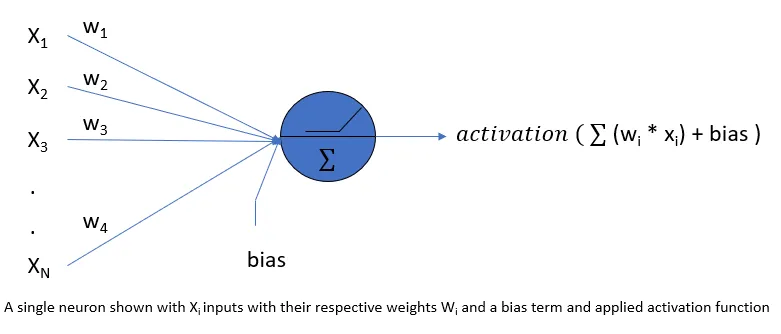

Las redes neuronales nacen con la intención de modelar algo similar al cerebro humano. Están compuestas por nodos y capas, donde cada capa posee una cierta cantidad de nodos. Las capas más importantes son las de entrada y las de salida, donde la primera se encarga de recibir las características de los datos y la de salida se encarga de dar el resultado. En la imagen de arriba, vemos un modelo de N nodos de entrada con un solo nodo de salida.

Otros elementos importantes de las redes neuronales son los pesos, los bias y las funciones de activación. Los pesos es donde está la inteligencia de la red, ya que determinan cuánta importancia va a tener cada característica. Existen varias maneras de inicializar los pesos, por lo general se suelen utilizar valores entre 0 y 1. Los pesos se van actualizando a medida que se entrena la red, con una función llamada backpropagation, que veremos más adelante.
Los bias son simplemente constantes que nunca cambian su input. Utilizarlos es opcional, pero hay casos donde puede mejorar significativamente el rendimiento del modelo.

### Funciones de activación

Las funciones de activación son muy importantes para una red neuronal, ya que permiten obtener relaciones no-lineales entre los datos, al introducir funciones no lineales. las funciones de activacion se utilizan cuando se obtiene un resultado de los pesos por los input(la sumatoria de la imagen) y a ese resultado se le aplica una función de activación. abajo se muestran unas funciones de activación comunes con sus fórmulas y sus derivadas.

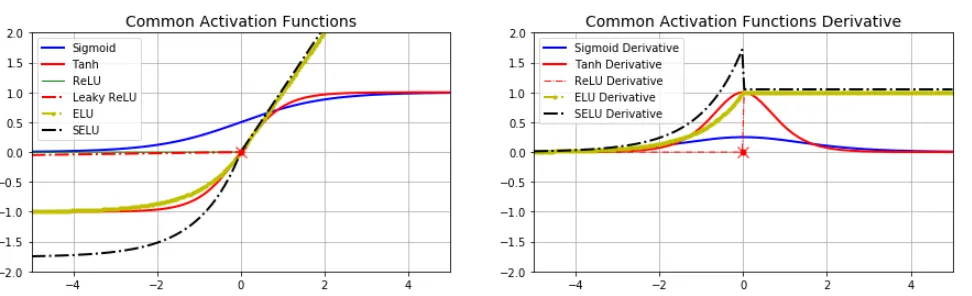

#### Funcion sigmoidal

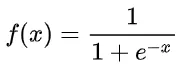

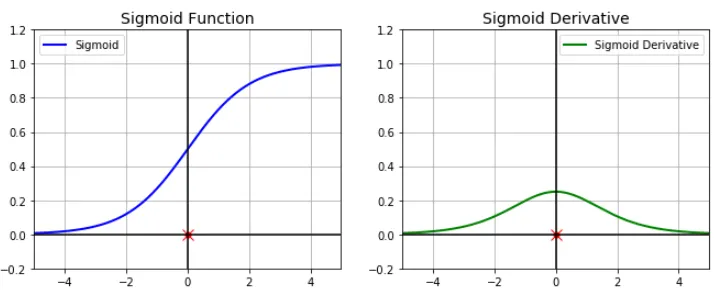

####Función tangente hiperbólica

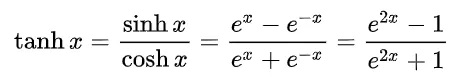

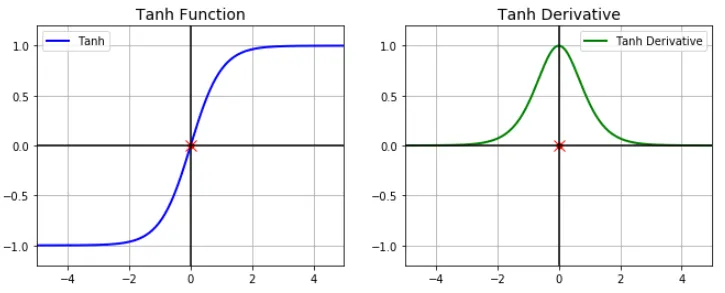

#### Función Rectified Linear Unit (ReLU)

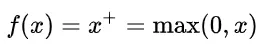

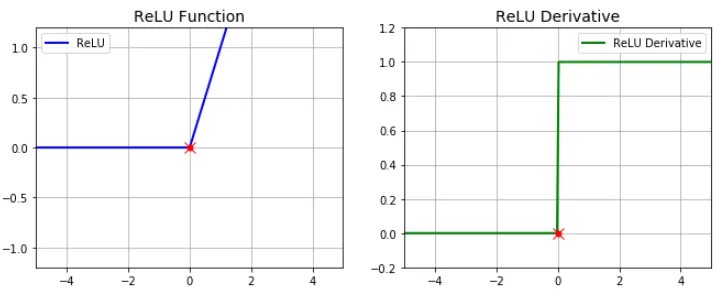

### Algoritmo de Backpropagation

El algoritmo de backpropagation es, posiblemente, el algoritmo más importante dentro de una red neuronal, ya que es lo que permite que la red aprenda de los datos. Cuando entrenamos una red, primero realizamos lo que se llama el forward pass, que es simplemente realizar las operaciones dentro de la red (multiplicar los pesos por el input y obtener el resultado de las funciones de activación capa por capa) hasta obtener un resultado en la capa de salida. En cada red neuronal tenemos una función de costo, que es la que utilizamos para medir el rendimiento de la red. A modo de ejemplo, si realizamos un problema de regresión donde el resultado esperado es 10 y la red entrega 8, si utilizaramos como función de costo el error cuadrático medio(MSE), obtendríamos 4. Como se puede ver, lo que se busca es ***minimizar*** la función de costo lo más posible.

Dado el ejemplo anterior, es claro que queremos cambiar los pesos de la red, dado que lo ideal sería que pudiera entregar 10. ¿Cómo hacemos esto? Aquí es donde entra el backpropagation.

Lo que busca el backpropagation es minimizar la función de costo, actualizando los pesos de la red a través del **gradiente** de la función de costo con respecto a estos.

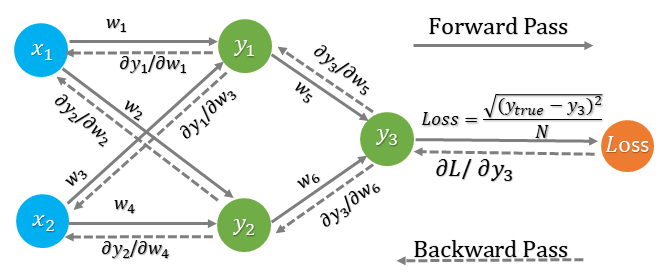

En la imagen de arriba, vemos un ejemplo de backpropagation, donde se pueden ver los gradientes con respecto a los pesos.

https://hmkcode.com/ai/backpropagation-step-by-step/ \\
Aqui hay una buena guía para entender el algoritmo de manera teórica con un ejemplo hecho a mano

#### Ejemplo práctico (XOR)

Para entender mejor cómo funciona el backpropagation, vamos a utilizar un ejemplo de una red neuronal como la que se ve en la foto de abajo, para poder calcular la función XOR. Este es un operador lógico que funciona como se ve en la siguiente tabla:

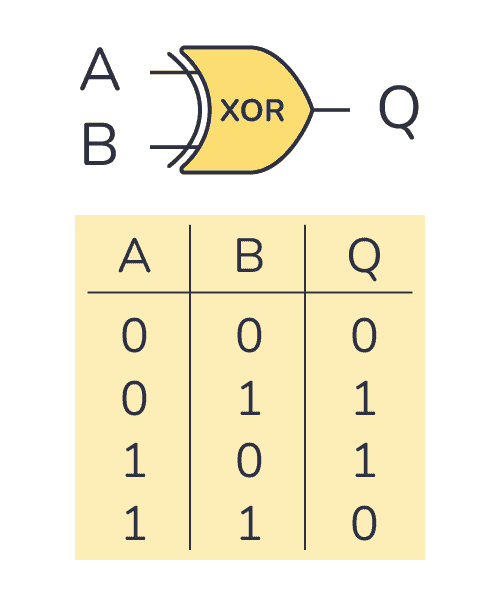

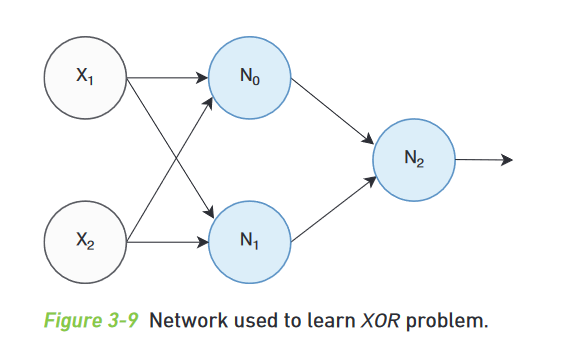

In [1]:
#codigo obtenido del libro Learning Deep Learning, del Nvidia Deep Learning Institute
import numpy as np
np.random.seed(3) # To make repeatable
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3] # Used to randomize order
# Define training examples.
x_train = [np.array([1.0, -1.0, -1.0]), #el primer elemento de cada array será el bias(omitido en la figura de arriba)
           np.array([1.0, -1.0, 1.0]),
           np.array([1.0, 1.0, -1.0]),
           np.array([1.0, 1.0, 1.0])]
y_train = [0.0, 1.0, 1.0, 0.0] # Output (ground truth)

In [2]:
def neuron_w(input_count): #definimos los pesos de los nodos
  weights = np.zeros(input_count+1)
  for i in range(1, (input_count+1)):
    weights[i] = np.random.uniform(-1.0, 1.0)
  return weights
n_w = [neuron_w(2), neuron_w(2), neuron_w(2)]
n_y = [0, 0, 0]
n_error = [0, 0, 0]

In [3]:
def show_learning():#función para visualizar los cambios en los pesos
  print('Current weights:')
  for i, w in enumerate(n_w):
    print('neuron ', i, ': w0 =', '%5.2f' % w[0],
      ', w1 =', '%5.2f' % w[1], ', w2 =',
      '%5.2f' % w[2])
  print('----------------')

In [4]:
def forward_pass(x): # aqui realizamos el feed forward. Notar que representamos los pesos como matrices para optimizar el codigo
  global n_y
  n_y[0] = np.tanh(np.dot(n_w[0], x)) # Neuron 0
  n_y[1] = np.tanh(np.dot(n_w[1], x)) # Neuron 1
  
  n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
  
  z2 = np.dot(n_w[2], n2_inputs)
  
  n_y[2] = 1.0 / (1.0 + np.exp(-z2))

In [5]:
def backward_pass(y_truth): # aqui definimos el backpropagation
  global n_error
  error_prime = -(y_truth - n_y[2]) # Derivative of loss-func
  derivative = n_y[2] * (1.0 - n_y[2]) # Logistic derivative
  n_error[2] = error_prime * derivative
  derivative = 1.0 - n_y[0]**2 # tanh derivative
  n_error[0] = n_w[2][1] * n_error[2] * derivative
  derivative = 1.0 - n_y[1]**2 # tanh derivative
  n_error[1] = n_w[2][2] * n_error[2] * derivative

In [6]:
def adjust_weights(x): # ajuste de pesos
  global n_w
  n_w[0] -= (x * LEARNING_RATE * n_error[0])
  n_w[1] -= (x * LEARNING_RATE * n_error[1])
  n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
  n_w[2] -= (n2_inputs * LEARNING_RATE * n_error[2])

In [7]:
# Network training loop.
all_correct = False
while not all_correct: # Train until converged
  all_correct = True
  np.random.shuffle(index_list) # Randomize order
  for i in index_list: # Train on all examples
    forward_pass(x_train[i])
    backward_pass(y_train[i])
    adjust_weights(x_train[i])
    show_learning() # Show updated weights
  for i in range(len(x_train)): # Check if converged
    forward_pass(x_train[i])
    print('x1 =', '%4.1f' % x_train[i][1], ', x2 =',
      '%4.1f' % x_train[i][2], ', y =',
      '%.4f' % n_y[2])
    if(((y_train[i] < 0.5) and (n_y[2] >= 0.5)) or ((y_train[i] >= 0.5) and (n_y[2] < 0.5))):
      all_correct = False

Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 =  0.01 , w1 = -0.41 , w2 =  0.01
neuron  2 : w0 =  0.01 , w1 =  0.78 , w2 =  0.79
----------------
Current weights:
neuron  0 : w0 =  0.00 , w1 =  0.12 , w2 =  0.41
neuron  1 : w0 =  0.00 , w1 = -0.40 , w2 =  0.02
neuron  2 : w0 =  0.00 , w1 =  0.79 , w2 =  0.78
----------------
Current weights:
neuron  0 : w0 = -0.00 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 = -0.01 , w1 = -0.41 , w2 =  0.01
neuron  2 : w0 = -0.01 , w1 =  0.78 , w2 =  0.79
----------------
Current weights:
neuron  0 : w0 =  0.00 , w1 =  0.11 , w2 =  0.41
neuron  1 : w0 = -0.00 , w1 = -0.42 , w2 =  0.02
neuron  2 : w0 = -0.00 , w1 =  0.78 , w2 =  0.79
----------------
x1 = -1.0 , x2 = -1.0 , y = 0.4811
x1 = -1.0 , x2 =  1.0 , y = 0.6347
x1 =  1.0 , x2 = -1.0 , y = 0.3645
x1 =  1.0 , x2 =  1.0 , y = 0.5179
Current weights:
neuron  0 : w0 =  0.01 , w1 =  0.10 , w2 =  0.42
neuron  1 : w0 =  0.00 , w1 = -0.42 , w2 =  0.02
neuron  2 : w0 =  0.0

En el output de la celda anterior, podemos ver como van cambiando los pesos de la red a medida que se entrena. Al final, vemos que los "y" entregados al final aprendieron correctamente, ya que valores menores a 0.5 representan un 0 y mayores un 1.

## Problema de regresión

En esta sección se mostrará un problema de regresión. Se utilizará el Boston Housing dataset, un set de datos bien conocido. Puede obtener más información de este en el siguiente enlace: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

2023-06-24 21:07:39.361799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
print(f'Training data : {train_data.shape}') #dimensiones del entrenamiento y el testing
print(f'Test data : {test_data.shape}')

Training data : (404, 13)
Test data : (102, 13)


Como es usual, vamos a normalizar los datos de entrada, por lo general esto ayuda a entregar mejores resultados.

In [10]:
#normalizacion de datos
ft_wise_mean = train_data.mean(axis=0) 
train_data -= ft_wise_mean
ft_wise_std = train_data.std(axis=0)
train_data /= ft_wise_std
#
test_data -= ft_wise_mean
test_data /= ft_wise_std

Aquí vamos a construir la red neuronal utilizando Keras. Se crea el modelo utilizando models.Sequential(), después con .add se pueden añadir nuevas capas. La cantidad de neuronas de cada capa se pueden modificar, así como las funciones de activación. \\
Finalmante, una vez construida la red, se utiliza .compile() para definir el optimizador a utilizar, la función de costo y las métricas que se quieran utilizar. 

In [11]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='tanh', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(16,activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
    return model

Construimos el modelo y utilizamos .fit() para entrenar el modelo con los datos del Boston Housing. Epochs se refiere a la cantidad de veces que se pasa por todos los datos. En este caso lo tendremos en 50, pero se puede cambiar para ver como varía el entrenamiento.

In [12]:
model = build_model()
model.fit(train_data, train_targets, epochs=50)
print('*' * 25, 'DATOS DE TEST', '*' * 25)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2023-06-24 21:08:01.199829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


13/13 [==============================] - 1s 2ms/step - loss: 563.3725 - mae: 21.8832
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 498.5334 - mae: 20.2516
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 366.3860 - mae: 16.6710
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 184.6972 - mae: 10.9438
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 91.4258 - mae: 7.6228
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 57.8467 - mae: 5.6766
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 35.5506 - mae: 4.3769
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 29.3700 - mae: 3.9274
Epoch 9/50
13/13 [==============================] - 0s 12ms/step - loss: 25.4983 - mae: 3.7115
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 22.2178 - mae: 3.4719
Epoch 11/50
13/13 [==============================] - 0s 6ms/s

Con .evaluate, podemos evaluar el modelo en el conjunto de datos de test.

In [13]:
score = model.evaluate(test_data, test_targets, verbose = 0) 
print('Test mse:', score[0]) 
print('Test mae:', score[1])

Test mse: 16.824312210083008
Test mae: 2.777573585510254


## Problema de clasificación

Aqui realizaremos un problema de clasificación. Para este, utilizaremos un dataset con datos de pacientes nativo-americanos para determinar si poseen o no diabetes. Para más información del dataset, dirigirse al siguiente enlace: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [14]:
#codigo obtenido de blog: https://www.bmc.com/blogs/keras-neural-network-classification/
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
import pandas as pd

In [15]:
data = pd.read_csv('diabetes.csv', delimiter=',')

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separamos los datos en entrenamiento y testing.

In [16]:
from sklearn.model_selection import train_test_split
labels=data['Outcome']
features = data.iloc[:,0:8]
X=features
y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=True)

Normalizamos los datos

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

Creamos la red neuronal:

In [18]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilamos el modelo y aplicamos .fit(). La función de pérdida utilizada es de entropía cruzada binaria, la cuál generalmente se utiliza para problemas de clasificación donde hay dos clases.

In [19]:
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=100,verbose=1)

Epoch 1/100


20/20 [==============================] - 1s 7ms/step - loss: 0.7920 - accuracy: 0.4902
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7672 - accuracy: 0.5326
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.5554
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.7335 - accuracy: 0.5928
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.6189
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.6498
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.6661
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.6694
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6808
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6775
Epoch 11/100
20/20 [=

Aquí podemos ver un resumen del modelo, junto con sus capas.

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


Otra forma de visualizar la red:

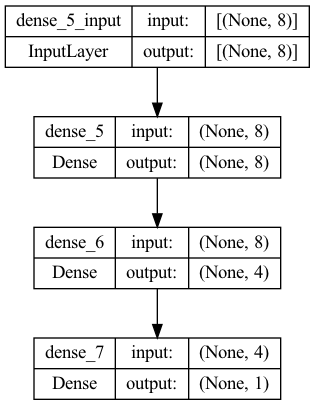

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [22]:
score = model.evaluate(X_test, y_test,verbose=1)
print("Costo de pérdida: ",score[0])
print("Precisión: ",score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7403
Costo de pérdida:  0.5503225326538086
Precisión:  0.7402597665786743


Vemos que para este caso la precisión no es muy buena. Esto puede deberse a varios factores, uno de ellos es que el dataset es muy pequeño, y por lo general las redes neuronales funcionan mejor con una mayor cantidad de datos. También se puede probar cambiando los hiperparámetros de la red para obtener mejores resultados.

## Further reading

Acá van unos enlaces que pueden ser interesantes para saber más sobre las redes neuronales, las bases del llamado "Deep Learning".

En este blog, Andrej Karpathy explica la importancia de entender el backpropagation: https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b \\
Ejemplo de backpropagation hecho a mano: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/ \\
Página oficial de keras, contiene muchos tutoriales y documentación que puden ser útiles: https://keras.io/ \\
Página oficial de pytorch, otro framework de Deep Learning que ha obtenido bastante popularidad en los últimos años: https://pytorch.org/docs/stable/index.html \\